<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework5_problem1(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Non Linear | Epoch 500, loss 10.767002
Non Linear | Epoch 1000, loss 8.067449
Non Linear | Epoch 1500, loss 6.385304
Non Linear | Epoch 2000, loss 5.336515
Non Linear | Epoch 2500, loss 4.682017
Non Linear | Epoch 3000, loss 4.272974
Non Linear | Epoch 3500, loss 4.016738
Non Linear | Epoch 4000, loss 3.855634
Non Linear | Epoch 4500, loss 3.753753
Non Linear | Epoch 5000, loss 3.688746
Linear    | Epoch 500, loss 7.732153
Linear    | Epoch 1000, loss 3.791353
Linear    | Epoch 1500, loss 3.082915
Linear    | Epoch 2000, loss 2.955558
Linear    | Epoch 2500, loss 2.932662
Linear    | Epoch 3000, loss 2.928545
Linear    | Epoch 3500, loss 2.927807
Linear    | Epoch 4000, loss 2.927674
Linear    | Epoch 4500, loss 2.927651
Linear    | Epoch 5000, loss 2.927646

=== Final Summary ===
Non Linear (lr=1e-4): final loss = 3.688746, params [w2, w1, b] = [0.4113047420978546, -0.942139208316803, -0.7723725438117981]
Linear    (lr=1e-2): final loss = 2.927646, params [w, b]     = [4.4726128578186

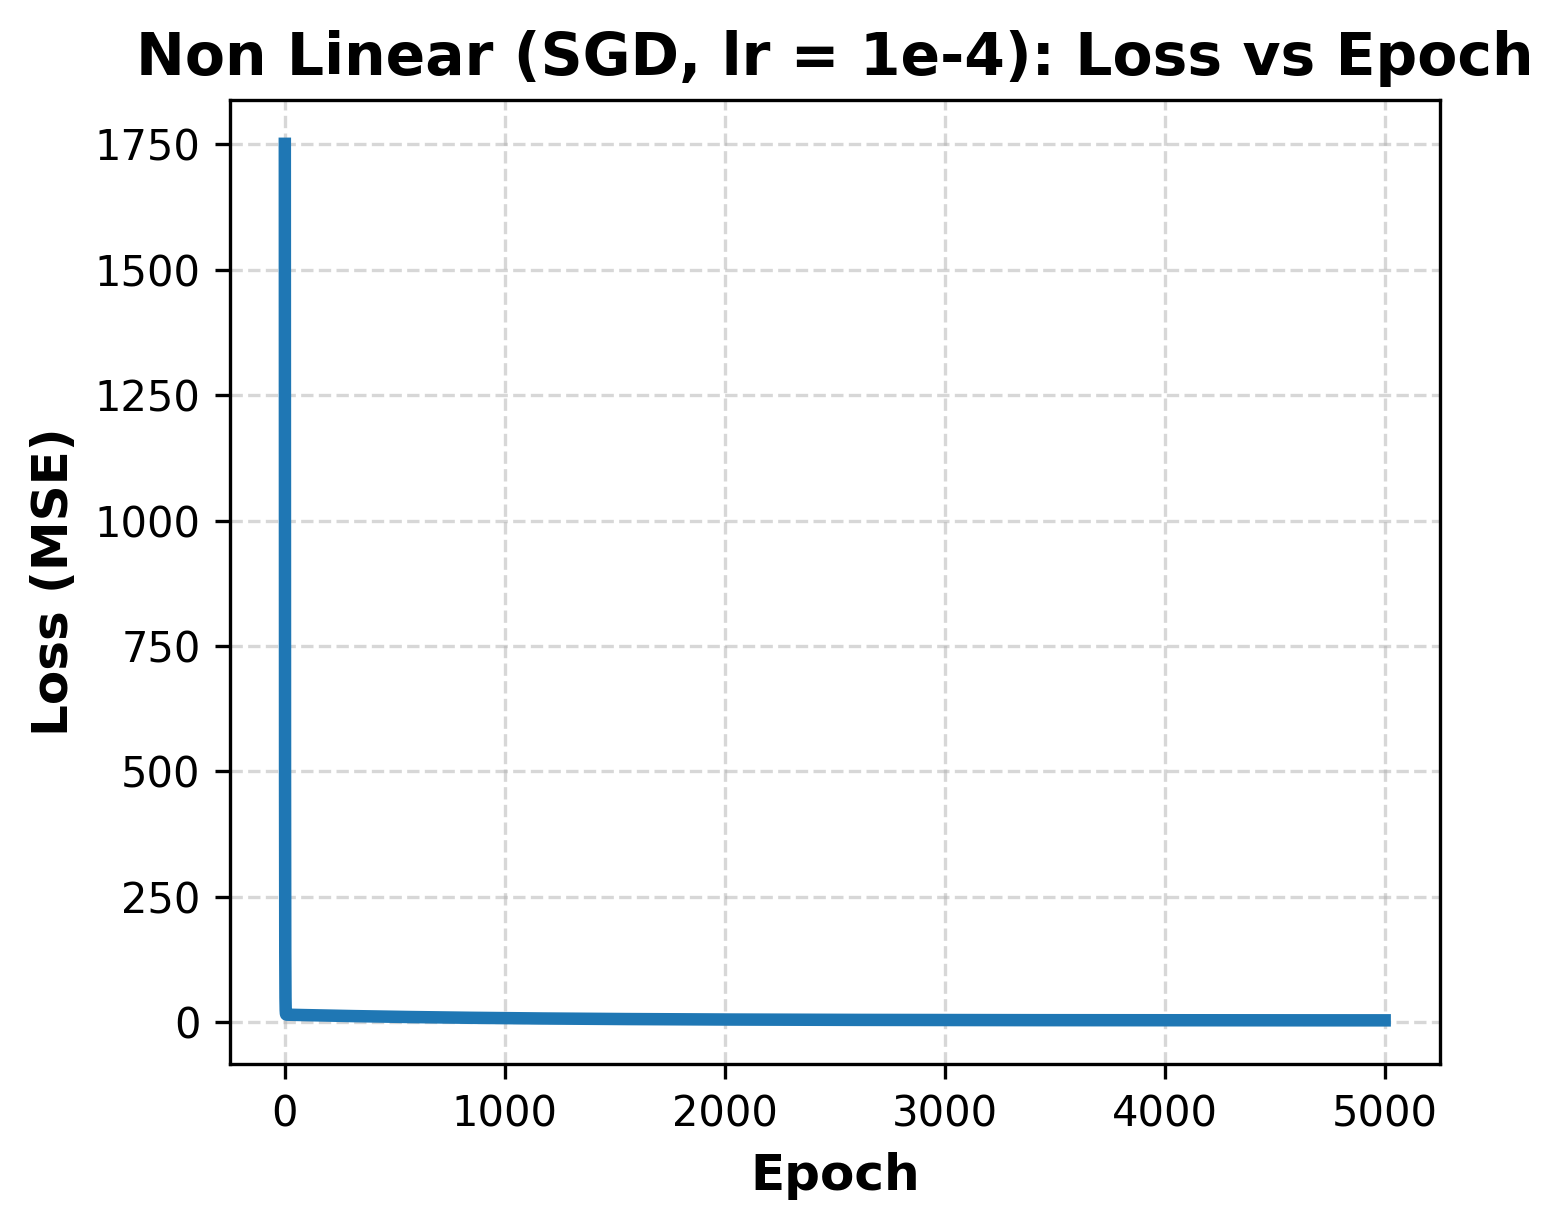

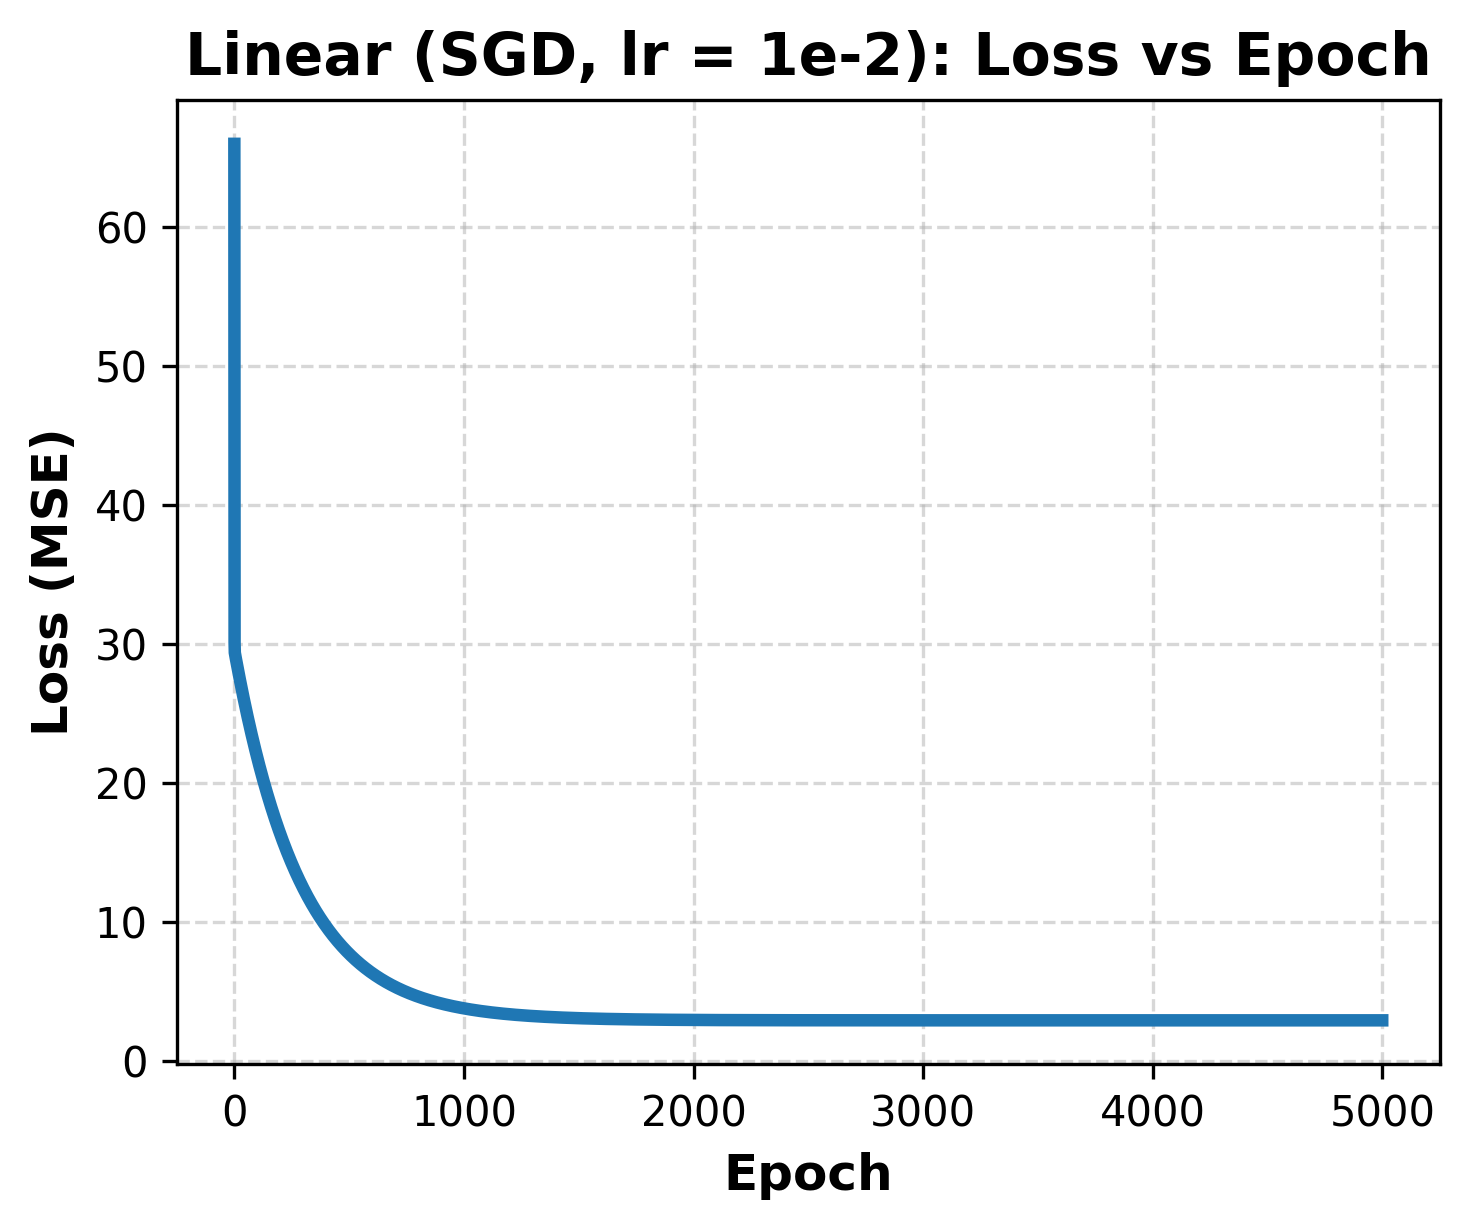

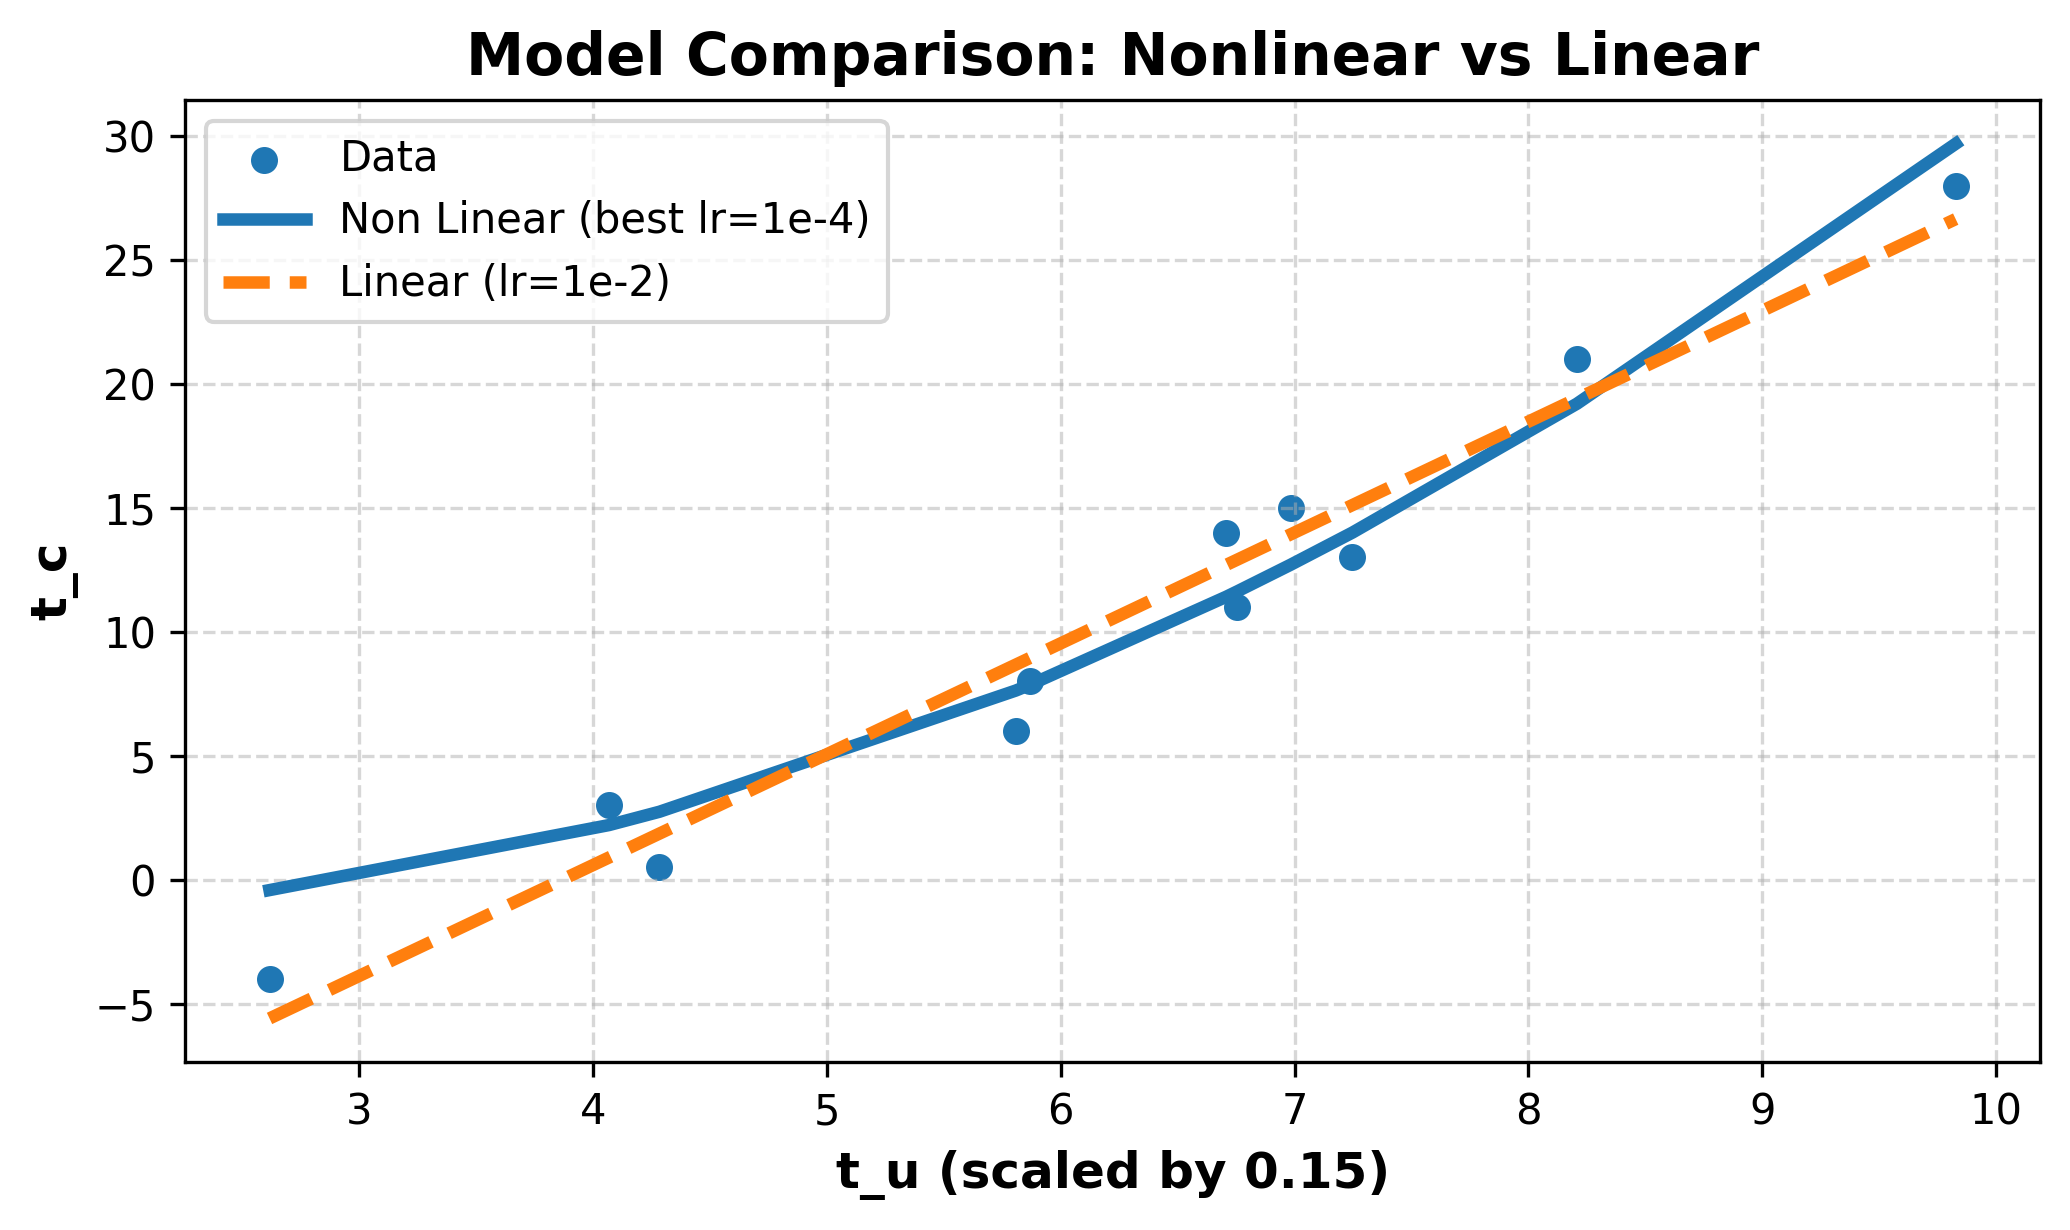

In [11]:
import torch
import matplotlib.pyplot as plt

# ---------- Data (exact as before) ----------
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c, dtype=torch.float32)
t_u = torch.tensor(t_u, dtype=torch.float32)

# Scale t_u (as in your code)
t_u = t_u * 0.12

# ---------- Models ----------
def model_quadratic(t_u, w2, w1, b):
    # Nonlinear: t_c_hat = w2 * t_u^2 + w1 * t_u + b
    return w2 * t_u**2 + w1 * t_u + b

def model_linear(t_u, w, b):
    # Linear baseline: t_c_hat = w * t_u + b
    return w * t_u + b

# ---------- Loss ----------
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# ---------- Training loops (mirror your style) ----------
def training_loop_quadratic(n_epochs, optimizer, params, t_u, t_c):
    history = []
    for epoch in range(1, n_epochs + 1):
        t_p = model_quadratic(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        history.append(float(loss.detach()))
        if epoch % 500 == 0:
            print('Non Linear | Epoch %d, loss %f' % (epoch, float(loss)))
    return params, history

def training_loop_linear(n_epochs, optimizer, params, t_u, t_c):
    history = []
    for epoch in range(1, n_epochs + 1):
        t_p = model_linear(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        history.append(float(loss.detach()))
        if epoch % 500 == 0:
            print('Linear    | Epoch %d, loss %f' % (epoch, float(loss)))
    return params, history

# ---------- Train Nonlinear (best lr = 1e-4) ----------
params_quad = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)  # [w2, w1, b]
optimizer_quad = torch.optim.SGD([params_quad], lr=1e-4)
params_quad, hist_quad = training_loop_quadratic(
    n_epochs = 5000,
    optimizer = optimizer_quad,
    params = params_quad,
    t_u = t_u,
    t_c = t_c
)

# ---------- Train Linear baseline (saved settings: SGD, lr=1e-2) ----------
params_lin = torch.tensor([1.0, 0.0], requires_grad=True)        # [w, b]
optimizer_lin = torch.optim.SGD([params_lin], lr=1e-2)
params_lin, hist_lin = training_loop_linear(
    n_epochs = 5000,
    optimizer = optimizer_lin,
    params = params_lin,
    t_u = t_u,
    t_c = t_c
)

print("\n=== Final Summary ===")
print(f"Non Linear (lr=1e-4): final loss = {hist_quad[-1]:.6f}, params [w2, w1, b] = {params_quad.detach().tolist()}")
print(f"Linear    (lr=1e-2): final loss = {hist_lin[-1]:.6f}, params [w, b]     = {params_lin.detach().tolist()}")

# ---------- High-definition, bold plots ----------
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Loss plot: Quadratic
plt.figure(figsize=(5, 4.2), dpi=300)
plt.plot(hist_quad, linewidth=3)
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Non Linear (SGD, lr = 1e-4): Loss vs Epoch', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Loss plot: Linear
plt.figure(figsize=(5, 4.2), dpi=300)
plt.plot(hist_lin, linewidth=3)
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Linear (SGD, lr = 1e-2): Loss vs Epoch', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# predictions with trained params
t_c_pred_quad = model_quadratic(t_u, *params_quad.detach())
t_c_pred_lin  = model_linear(t_u,  *params_lin.detach())

# sort x so the line is drawn left→right
idx = torch.argsort(t_u)

plt.figure(figsize=(7, 4.2), dpi=300)
plt.scatter(t_u, t_c, s=30, label='Data')
plt.plot(t_u[idx], t_c_pred_quad[idx], linewidth=3, label='Non Linear (best lr=1e-4)')
plt.plot(t_u[idx], t_c_pred_lin[idx],  linewidth=3, linestyle='--', label='Linear (lr=1e-2)')
plt.xlabel('t_u (scaled by 0.15)', fontsize=12, fontweight='bold')
plt.ylabel('t_c', fontsize=12, fontweight='bold')
plt.title('Model Comparison: Nonlinear vs Linear', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()


